# Chapter 7: Data Cleaning and Preparation

## 7.1 Handling Missing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# "Sentinel" value (null).
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [3]:
# None is trated as Nan.
string_data = pd.Series(["hello", np.nan, None, "avocado"])
string_data

0      hello
1        NaN
2       None
3    avocado
dtype: object

In [4]:
string_data.isna()

0    False
1     True
2     True
3    False
dtype: bool

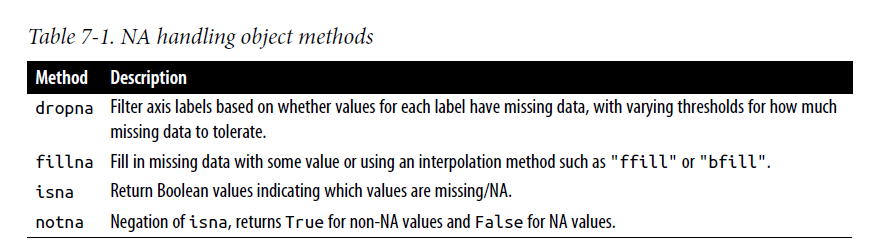

In [5]:
# Dropping na values.
string_data.dropna()

0      hello
3    avocado
dtype: object

In [6]:
string_data[string_data.notna()]

0      hello
3    avocado
dtype: object

In [7]:
# By default, .dropna() drops any row containing a missing value.
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan], [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])

In [8]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [9]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


In [10]:
data.dropna(how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [11]:
data[4] = np.nan

In [12]:
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [13]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [14]:
# Can also specify the threshold for at most a certain number of missing observations.
df = pd.DataFrame(np.random.standard_normal((7,3)))
df.iloc[:4,1] = np.nan
df.iloc[:2,2] = np.nan
df

,0,1,2
0,-0.699436,NaN,NaN
1,-0.048316,NaN,NaN
2,-1.132431,NaN,-0.431114
3,-0.266088,NaN,-0.851126
4,-1.071479,0.558106,-0.954195
5,0.637968,1.058926,-0.157759
6,0.093761,-0.415358,-1.076068


In [15]:
df.dropna()

,0,1,2
4,-1.071479,0.558106,-0.954195
5,0.637968,1.058926,-0.157759
6,0.093761,-0.415358,-1.076068


In [16]:
df.dropna(thresh=2)

,0,1,2
2,-1.132431,NaN,-0.431114
3,-0.266088,NaN,-0.851126
4,-1.071479,0.558106,-0.954195
5,0.637968,1.058926,-0.157759
6,0.093761,-0.415358,-1.076068


In [17]:
# Filling in missing data.
df.fillna(0)

,0,1,2
0,-0.699436,0.000000,0.000000
1,-0.048316,0.000000,0.000000
2,-1.132431,0.000000,-0.431114
3,-0.266088,0.000000,-0.851126
4,-1.071479,0.558106,-0.954195
5,0.637968,1.058926,-0.157759
6,0.093761,-0.415358,-1.076068


In [18]:
# Calling fillna with a dictionary to use different fill value for each column.
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.699436,0.500000,0.000000
1,-0.048316,0.500000,0.000000
2,-1.132431,0.500000,-0.431114
3,-0.266088,0.500000,-0.851126
4,-1.071479,0.558106,-0.954195
5,0.637968,1.058926,-0.157759
6,0.093761,-0.415358,-1.076068


In [19]:
# Can also forward fill
df = pd.DataFrame(np.random.standard_normal((6,3)))
df.iloc[2:, 1] = np.nan
df.iloc[4:, 2] = np.nan
df

,0,1,2
0,-0.221240,-0.729552,1.313449
1,0.137744,-0.081162,0.386713
2,-0.190769,NaN,0.559862
3,0.572388,NaN,0.068109
4,-1.032391,NaN,NaN
5,-0.676732,NaN,NaN


In [20]:
df.ffill(limit=2)

,0,1,2
0,-0.221240,-0.729552,1.313449
1,0.137744,-0.081162,0.386713
2,-0.190769,-0.081162,0.559862
3,0.572388,-0.081162,0.068109
4,-1.032391,NaN,0.068109
5,-0.676732,NaN,0.068109


In [21]:
df = pd.DataFrame(np.random.standard_normal((7,3)))
df.iloc[:4,1] = np.nan
df.iloc[:2,2] = np.nan
df

,0,1,2
0,0.495490,NaN,NaN
1,-1.433520,NaN,NaN
2,1.090699,NaN,-0.963029
3,-0.721628,NaN,1.001239
4,-0.942137,-0.561505,-0.972977
5,0.011401,0.256954,0.078609
6,0.027334,-0.053771,0.951903


In [22]:
df.bfill()

,0,1,2
0,0.495490,-0.561505,-0.963029
1,-1.433520,-0.561505,-0.963029
2,1.090699,-0.561505,-0.963029
3,-0.721628,-0.561505,1.001239
4,-0.942137,-0.561505,-0.972977
5,0.011401,0.256954,0.078609
6,0.027334,-0.053771,0.951903


In [23]:
df.bfill(limit=2)

,0,1,2
0,0.495490,NaN,-0.963029
1,-1.433520,NaN,-0.963029
2,1.090699,-0.561505,-0.963029
3,-0.721628,-0.561505,1.001239
4,-0.942137,-0.561505,-0.972977
5,0.011401,0.256954,0.078609
6,0.027334,-0.053771,0.951903


In [24]:
# Can also fill the missing values with mean, median etc.
data = pd.Series([1., np.nan, 3.5, np.nan, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

### *Method* is depreciated now.
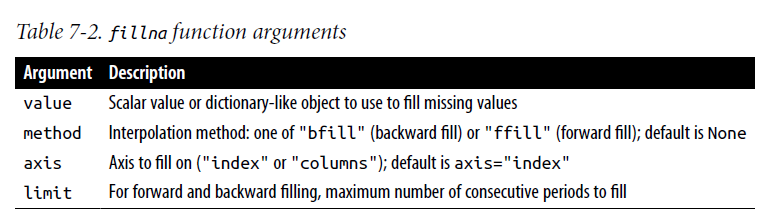

## 7.2 Data Transformation

### Filtering, cleaning, and other transofrmations are important operations as well.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 4, 4]})

In [27]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [28]:
# Duplicate: its column values are exactly equal to those in an earlier row.
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [29]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [30]:
data["v1"] = range(7)

In [31]:
data.drop_duplicates(subset=["k1"])

,k1,k2,v1
0,one,1,0
1,two,1,1


### Function or Mapping

In [32]:
data = pd.DataFrame({"food": ["bacon", "pulled pork", "bacon",
                     "pastrami", "corned beef", "bacon",
                     "pastrami", "honey ham", "nova lox"],
                     "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [33]:
meat_to_animal = {
"bacon": "pig",
"pulled pork": "pig",
"pastrami": "cow",
"corned beef": "cow",
"honey ham": "pig",
"nova lox": "salmon"
}

In [34]:
data["animal"] = data["food"].map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [35]:
# Can also do the same thing with a function.
def get_animal(x):
    return meat_to_animal[x]

data["food"].map(get_animal)

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Replacing values

In [36]:
data = pd.Series([1., -999, 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [37]:
# The -999 might be sentinel values for missing data. Replace with np.nan.
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [38]:
# Replace multiple values at once.
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [39]:
# Use a different replacement for each value, pass a list of substitutes.
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [40]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Discretization and binning

In [41]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)

In [42]:
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [43]:
data = pd.DataFrame(np.random.standard_normal((1000, 4)))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.017397,-0.037988,0.042391,-0.008454
std,1.012327,0.975356,0.978846,0.980167
min,-3.090914,-3.257732,-3.259427,-2.975079
25%,-0.710651,-0.715387,-0.623563,-0.675965
50%,0.006497,-0.025555,0.009728,0.009097
75%,0.635255,0.640611,0.731107,0.671186
max,3.377770,2.729905,3.236088,3.051256


In [44]:
data

,0,1,2,3
0,-0.073398,1.135331,0.223716,-0.255044
1,-0.470771,1.433067,0.559216,0.672196
2,1.147862,-0.217414,-0.612988,-2.054125
3,-0.772762,0.857144,0.263644,0.501581
4,0.864799,-0.339933,-0.361394,-1.348882
...,...,...,...,...
995,1.582642,-0.775144,0.037380,-0.293077
996,-0.394804,1.102049,0.022136,2.057908
997,0.394094,-2.276771,-0.276763,-1.186360
998,-0.016423,0.798993,0.867770,1.201166


In [45]:
# Find some outliers. Let's say values greater than abs(3).
data[(data.abs() > 3).any(axis="columns")]

,0,1,2,3
165,-0.212657,-1.192085,3.236088,-1.123846
170,0.237556,-0.764861,-3.259427,1.221278
177,0.496508,-3.231314,-0.135210,0.614068
393,0.307143,-3.035645,-0.835395,0.381346
551,-1.129242,-0.294126,1.929268,3.051256
665,-3.090914,-1.178574,-0.053139,-0.101132
743,0.305526,-3.257732,0.143558,1.734549
775,0.932880,-3.183983,1.865774,-0.793342
819,3.377770,-0.965220,-0.095414,0.254148


In [46]:
# we can use the sign to produce 1 or -1 values based on whether the values in data are positive or negative.
np.sign(data).head()

,0,1,2,3
0,-1.0,1.0,1.0,-1.0
1,-1.0,1.0,1.0,1.0
2,1.0,-1.0,-1.0,-1.0
3,-1.0,1.0,1.0,1.0
4,1.0,-1.0,-1.0,-1.0
